#Lista 7

Nome: Lucas Martins Oliveira

Utilizando os métodos de Jacobi e Gauss-Seidel, resolva o seguinte problema
            \begin{equation*}
              \begin{cases}
                \nabla^2 u = 0 &\text{ para } \Omega\\
                u = 75 &\text{ para } \partial\Omega_{A}\\
                u = 100 &\text{ para } \partial\Omega_{B}\\
                u = 50 &\text{ para } \partial\Omega_{C}\\
                \nabla u \cdot \vec{n} = 0 &\text{ para } \partial\Omega_{D}
              \end{cases}
            \end{equation*}


Compare o número de iterações necessárias para convergir com um erro relativo de $10^{-8}$ e $h=0.1$

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
import math

from google.colab import files
from matplotlib.figure import projections

plt.rcParams['figure.figsize'] = [8, 6]

In [11]:
h = 0.1
x = np.arange(0, 1+h/2, h)
y = np.arange(0, 1+h/2, h)

#condicoes de contorno
u_a = 75 #dirichlet esquerdo
u_b = 100 #dirichlet topo
u_c = 50 #dirichlet direito
u_d = 0 #neumman base

k=0 #quantidade de interações
k_max = 100000 #numero maximo de iteraçoes do metodo
error=1
error_max = 1e-8 #erro para convergencia

Dada a equação:

\begin{equation*}
   \nabla^2 u = 0
\end{equation*}

Separamos a seção que não tem a variavel dependente para o lado direito da equação e denominamos-a de f:

\begin{equation*}
   f= 0
\end{equation*}

Nesse caso f vai ser igual à zero, já que o restante da equação está atrelado a variável dependente

Discretizando o restante da equação, obtemos a seguinte expressão:

\begin{equation*}
  u_{i,j} = \frac{u_{i-1,j} + u_{i+1,j} + u_{i,j-1} + u_{i,j-1} + h^2f_{i,j}}{4}
\end{equation*}

Implementando através de jacobi:

Numero de interações:  469
Erro:  9.703650253424133e-09


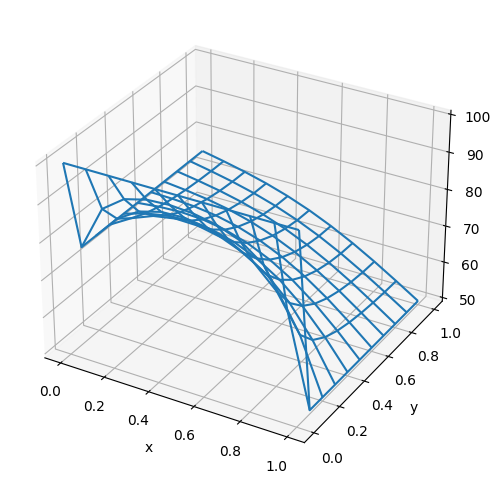

In [12]:
#funcao do lado direito f
f = np.zeros((len(x),len(y)))

#vetor solução
u=np.zeros((len(x),len(y))) #chute inicial -> 0
u_new=np.zeros((len(x),len(y)))

while (k<k_max and error > error_max):
  for i in range(len(x)):
    for j in range(len(y)):
      #TODAS AS RELAÇÕES COM PONTOS FICTICIOS
      # uijp = 2*h*u_c+u[i,tam-1] if j==tam-1 else u[i,j+1]
      # uijm = 2*h*u_a+u[i,1] if j==0 else u[i,j-1]
      # uipj = 2*h*u_d+u[tam-1,j] if i==tam-1 else u[i+1,j]
      # uimj = 2*h*u_b+u[1,j] if i==0 else u[i-1,j]


      #para tratar do tipo Dirichlet, devemos atribuir diretamente no ponto (x_i,y_j)
      if (i==0):
        u_new[i,j] = u_b
      elif(j==0):
        u_new[i,j] = u_a
      elif(j==len(y)-1) :
        u_new[i,j] = u_c
      else:
        #Tradando condicoes de contorno do tipo Neumann
        uijp = u[i,j+1]
        uijm = u[i,j-1]
        uipj = 2*h*u_d+u[len(x)-2,j] if i==len(x)-1 else u[i+1,j]
        uimj = u[i-1,j]

        u_new[i,j] = (uipj + uimj + uijp + uijm - f[i,j]*h**2)/4.0

  error = np.linalg.norm(u_new-u, np.inf)/np.linalg.norm(u_new, np.inf)
  k=k+1
  u = np.copy(u_new)

print("Numero de interações: ", k)
print("Erro: ", error)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(X, Y, u)

plt.ylabel('y')
plt.xlabel('x')

plt.show()

Implementando por meio de Gauss-seidal:

Numero de interações:  244
Erro:  9.479799242161459e-09


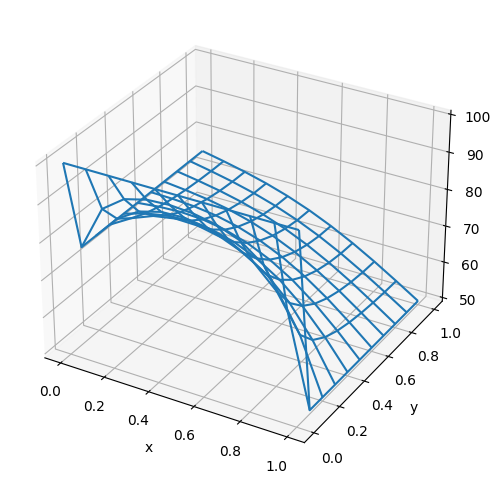

In [17]:
#vetor solução
u=np.zeros((len(x),len(y))) #chute inicial -> 0

kit=0
error = 1

while (kit<k_max and error > error_max): #loop da iteraçao de Gauss-Seidel
    u_old = np.copy(u)
    for i in range(len(x)): #loop sobre os pontos do espaço
      for j in range(len(y)):
        #para tratar do tipo Dirichlet, devemos atribuir diretamente no ponto (x_i,y_j)
        if (i==0):
          u[i,j] = u_b
        elif(j==0):
          u[i,j] = u_a
        elif(j==len(y)-1) :
          u[i,j] = u_c
        else:
          #Tradando condicoes de contorno do tipo Neumann
          uijp = u[i,j+1]
          uijm = u[i,j-1]
          uipj = 2*h*u_d+u[len(x)-2,j] if i==len(x)-1 else u[i+1,j]
          uimj = u[i-1,j]

          u[i,j] = (uipj + uimj + uijp + uijm - f[i,j]*h**2)/4.0

    error = np.linalg.norm(u-u_old, np.inf)/np.linalg.norm(u, np.inf)
    kit=kit+1

print("Numero de interações: ", kit)
print("Erro: ", error)

X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, u)
plt.ylabel('y')
plt.xlabel('x')

plt.show()